# Flickr8k Dataset EDA


## Downloading the data

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityajn105/flickr8k")

print("Path to dataset files:", path)

Resuming download from 7340032 bytes (1105631131 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/adityajn105/flickr8k?dataset_version_number=1 (7340032/1112971163) bytes left.


100%|██████████| 1.04G/1.04G [05:38<00:00, 3.26MB/s]

Extracting files...


Path to dataset files: /home/eren/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1


In [6]:
!mv /home/eren/.cache/kagglehub/datasets/adityajn105/flickr8k/versions/1/* ../data/flickr8k/


In [ ]:
DATASET_DIR = "../data/flickr8k"
IMAGES_DIR = f"{DATASET_DIR}/Images"
CAPTIONS_FILE = f"{DATASET_DIR}/captions.txt"


## Image Count

In [ ]:
import os

images = os.listdir(IMAGES_DIR)

print("Number of Images:", len(images))

Number of Images: 8091


In [10]:
import pandas as pd

df = pd.read_csv(CAPTIONS_FILE)

print(df.head())
print(df.info())

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   image    40455 non-null  object
 1   caption  40455 non-null  object
dtypes: object(2)
memory usage: 632.2+ KB
None


In [11]:
df["caption_len"] = df["caption"].str.split().str.len()

df["caption_len"].describe()


count    40455.000000
mean        11.782598
std          3.885152
min          1.000000
25%          9.000000
50%         11.000000
75%         14.000000
max         38.000000
Name: caption_len, dtype: float64

## Number of words in captions

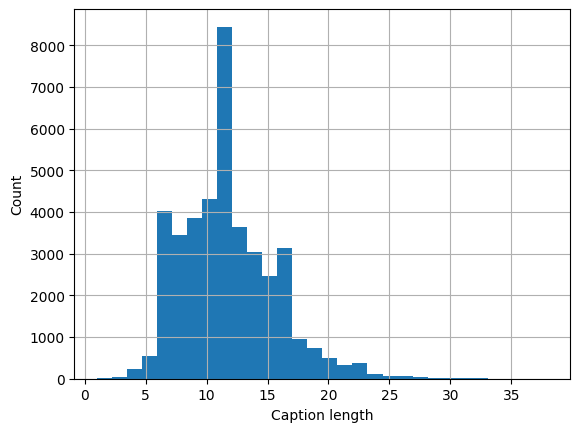

In [12]:
import matplotlib.pyplot as plt

df["caption_len"].hist(bins=30)
plt.xlabel("Caption length")
plt.ylabel("Count")
plt.show()


## Word Frequency & Vocab size

In [13]:
from collections import Counter

all_words = " ".join(df["caption"]).lower().split()
word_freq = Counter(all_words)

print("Vocab size:", len(word_freq))
word_freq.most_common(20)


Vocab size: 8918


[('a', 62986),
 ('.', 36577),
 ('in', 18974),
 ('the', 18418),
 ('on', 10743),
 ('is', 9345),
 ('and', 8851),
 ('dog', 8136),
 ('with', 7765),
 ('man', 7265),
 ('of', 6713),
 ('two', 5638),
 ('white', 3940),
 ('black', 3832),
 ('boy', 3581),
 ('are', 3504),
 ('woman', 3402),
 ('girl', 3328),
 (',', 3232),
 ('to', 3173)]

In [14]:
rare_words = [w for w, c in word_freq.items() if c == 1]
len(rare_words)


3681

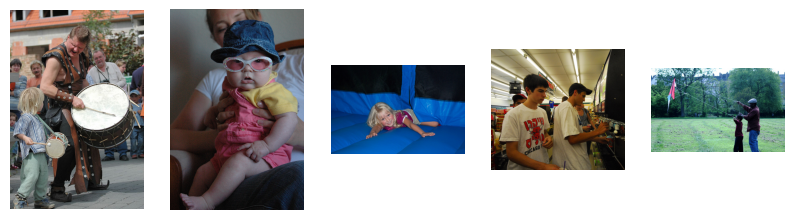

In [15]:
from PIL import Image
import random
import matplotlib.pyplot as plt

sample_imgs = random.sample(images, 5)

plt.figure(figsize=(10, 5))
for i, img_name in enumerate(sample_imgs):
    img = Image.open(f"{IMAGES_DIR}/{img_name}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis("off")

plt.show()


In [16]:
df["image"].value_counts().describe()


count    8091.0
mean        5.0
std         0.0
min         5.0
25%         5.0
50%         5.0
75%         5.0
max         5.0
Name: count, dtype: float64

In [ ]:
# Check if all images have exactly 5 captions
captions_per_image = df["image"].value_counts()
print(f"Min captions per image: {captions_per_image.min()}")
print(f"Max captions per image: {captions_per_image.max()}")
print(f"Images with != 5 captions: {(captions_per_image != 5).sum()}")

Min captions per image: 5
Max captions per image: 5
Images with != 5 captions: 0


In [ ]:
import re


def clean_caption(text):
    text = text.lower()
    text = re.sub(r"[^a-z ]", "", text)
    return text


df["clean_caption"] = df["caption"].apply(clean_caption)


## Bigrams and Trigrams

In [ ]:
from collections import Counter

# Bigrams and trigrams
bigrams = [
    " ".join(pair)
    for caption in df["clean_caption"]
    for pair in zip(caption.split()[:-1], caption.split()[1:])
]
trigrams = [
    " ".join(trio)
    for caption in df["clean_caption"]
    for trio in zip(caption.split()[:-2], caption.split()[1:-1], caption.split()[2:])
]

print("\nTop 10 bigrams:")
print(Counter(bigrams).most_common(10))
print("\nTop 10 trigrams:")
print(Counter(trigrams).most_common(10))


Top 10 bigrams:
[('in a', 6472), ('on a', 5221), ('in the', 5055), ('a man', 5054), ('with a', 3300), ('on the', 2484), ('of a', 2389), ('a woman', 2193), ('a dog', 1990), ('a black', 1986)]

Top 10 trigrams:
[('in front of', 1304), ('a man in', 1087), ('a group of', 1058), ('front of a', 876), ('man in a', 847), ('a black dog', 749), ('a brown dog', 741), ('and white dog', 735), ('in the snow', 671), ('in the air', 669)]


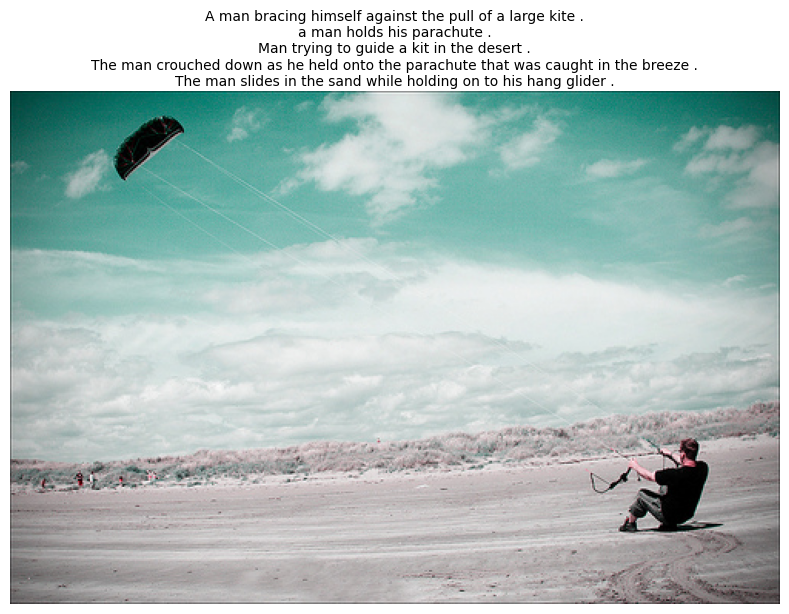

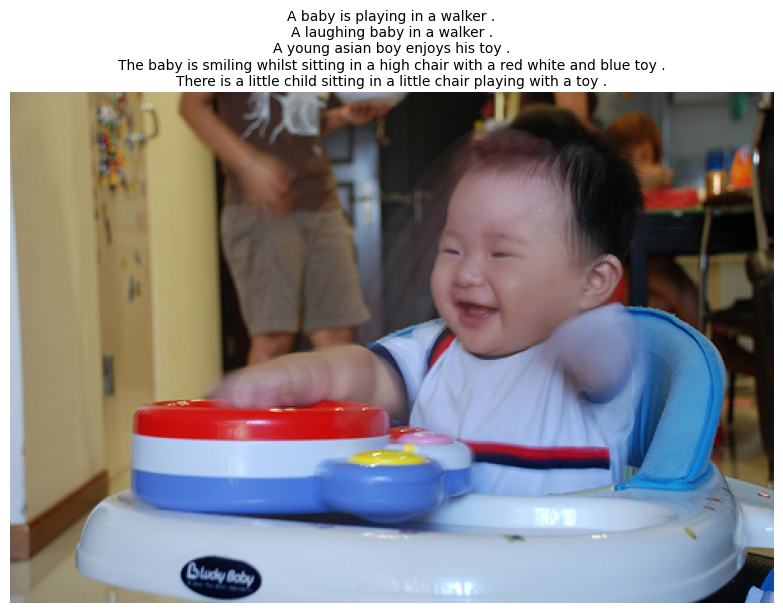

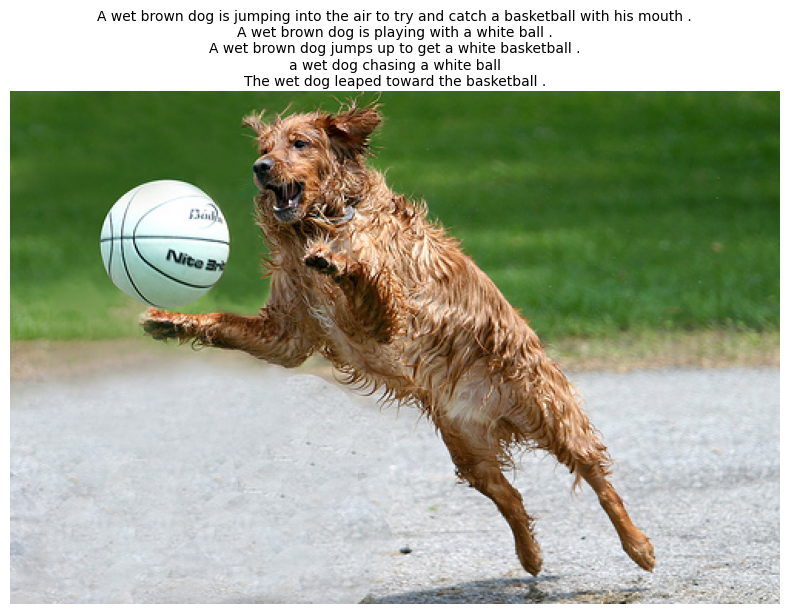

In [ ]:
# Show images WITH their captions
def show_image_with_captions(image_name):
    img = Image.open(f"{IMAGES_DIR}/{image_name}")
    captions = df[df["image"] == image_name]["caption"].tolist()

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("\n".join(captions), fontsize=10, wrap=True)
    plt.tight_layout()
    plt.show()


# Show 3 random examples
for img in random.sample(images, 3):
    show_image_with_captions(img)